<a href="https://colab.research.google.com/github/BA-Cde/Project-UAS/blob/main/077_Basyopi_SK3B_EDA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploratory Data Analysis (EDA) Dataset Iris

## Sumber Data
Dataset **Iris** pertama kali diperkenalkan oleh **Ronald A. Fisher (1936)** dalam publikasi *The use of multiple measurements in taxonomic problems*.  
Dalam praktikum ini, dataset diambil dari pustaka **scikit-learn** (Pedregosa et al., 2011) yang menyertakan data Iris secara langsung.

Dataset ini terdiri dari 150 sampel bunga iris dengan tiga spesies:  
- *Setosa*  
- *Versicolor*  
- *Virginica*  

Setiap sampel memiliki 4 fitur:  
1. Sepal length (cm)  
2. Sepal width (cm)  
3. Petal length (cm)  
4. Petal width (cm)  


In [9]:

# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset iris
iris = load_iris()

# Konversi ke DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


## Informasi Dasar Dataset

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


## Visualisasi Data

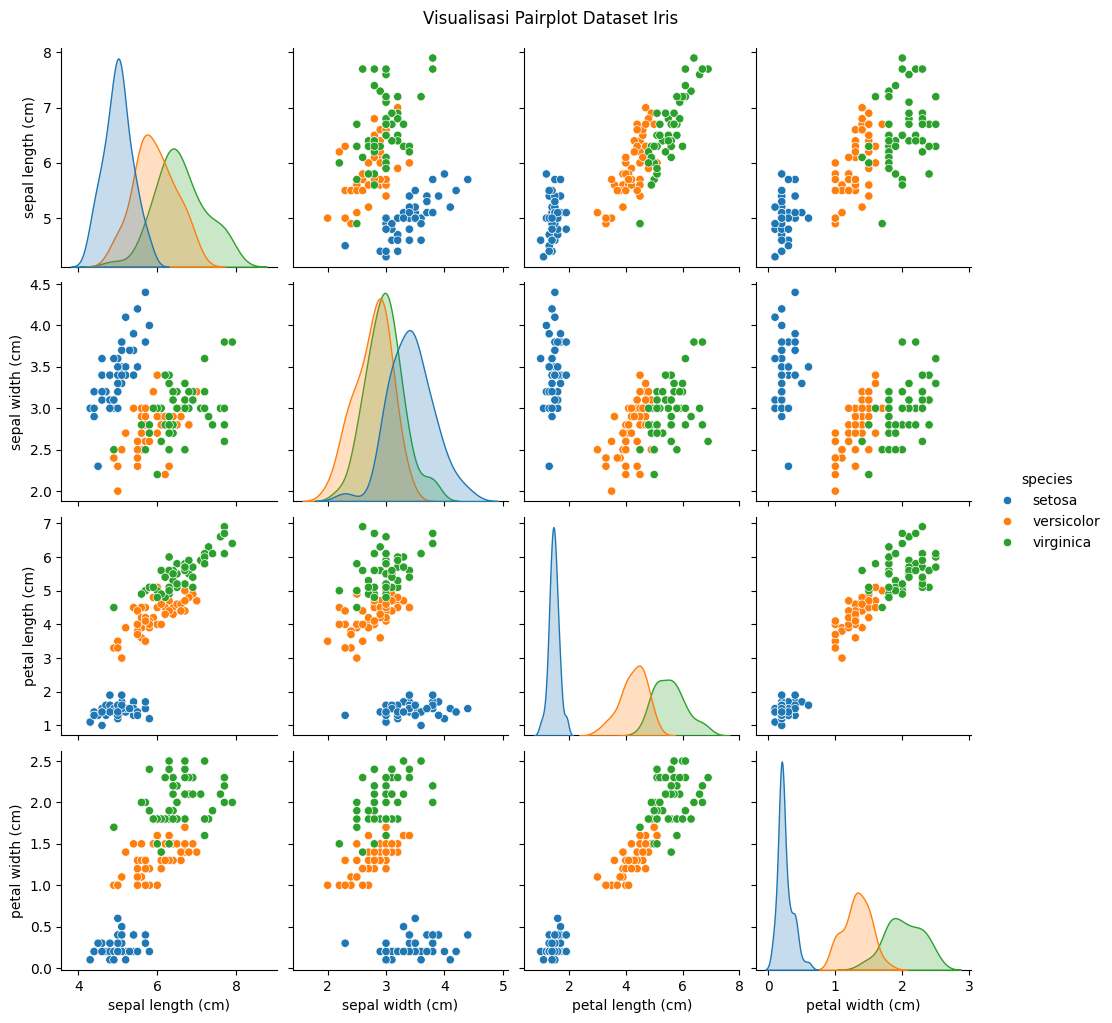

In [14]:

# Pairplot
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Visualisasi Pairplot Dataset Iris", y=1.02)
plt.show()


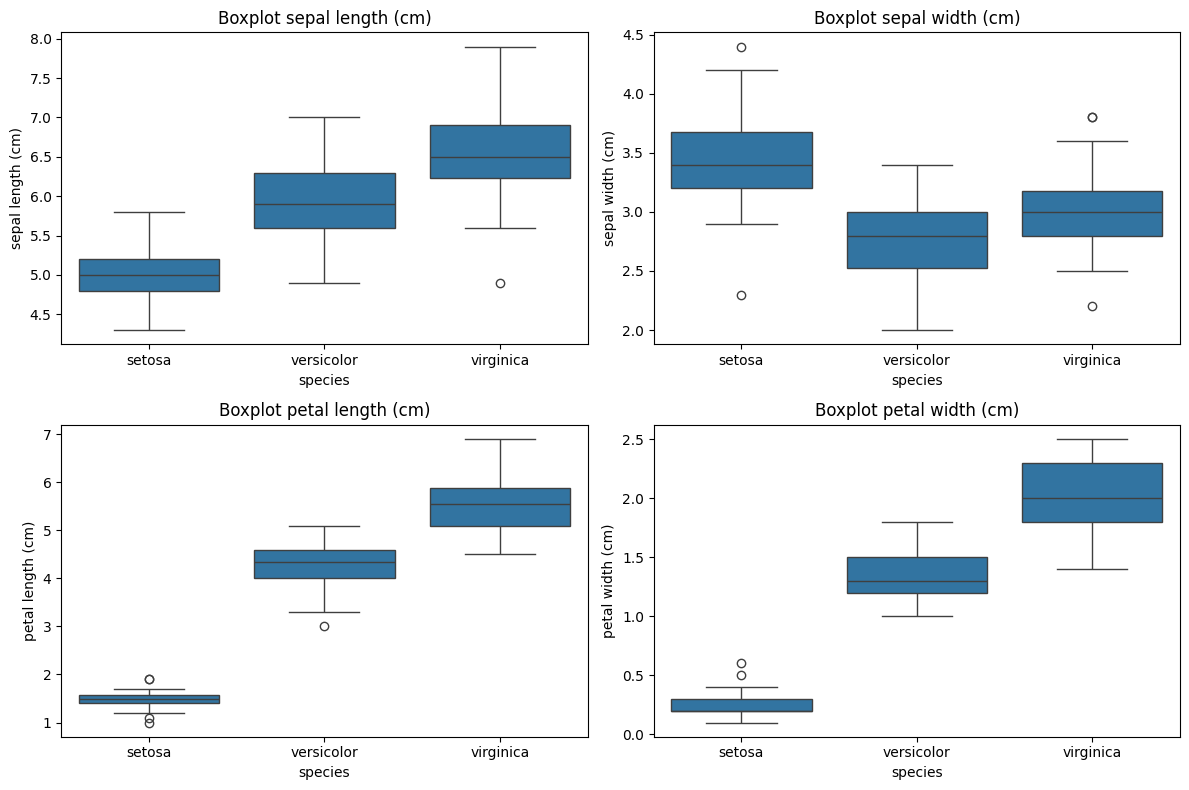

In [15]:

# Boxplot per fitur
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="species", y=col, data=df)
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()


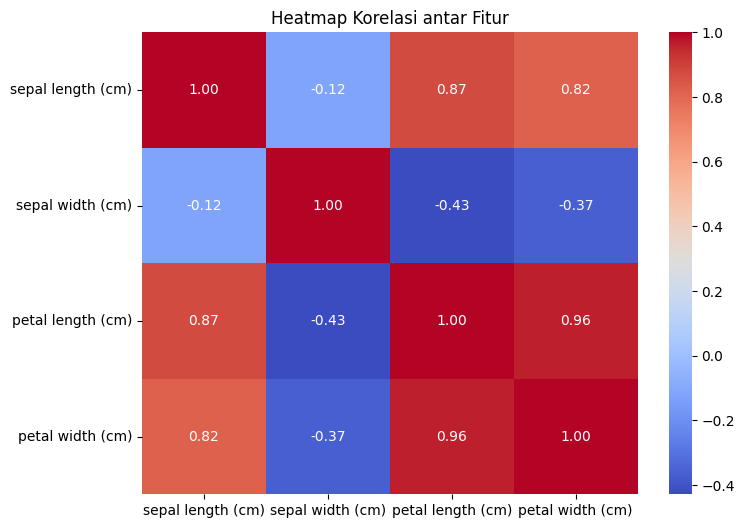

In [16]:

# Heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur")
plt.show()



## Kesimpulan Sementara
- Spesies **Setosa** memiliki ukuran petal yang kecil dan berbeda jelas dari dua spesies lainnya.  
- **Versicolor** dan **Virginica** memiliki distribusi fitur yang saling tumpang tindih sehingga lebih sulit dipisahkan.  
- Korelasi paling kuat terlihat pada fitur **petal length** dan **petal width**.  



## Daftar Pustaka

- Fisher, R.A. (1936). *The use of multiple measurements in taxonomic problems*. Annals of Eugenics, 7(2), 179–188.  
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.  
